<a href="https://colab.research.google.com/github/rodrigorenemenegazzo/Artificial-Intelligence/blob/main/TF03_CNN_Slide_61_Fashion_MNIST_Classifica%C3%A7%C3%A3o_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rodrigo Rene Menegazzo

Prática: Classificação de Imagens

Fashion MNIST
  * Base de roupas
  * Imagens em tons de cinza, 28 x 28
  * 10 classes: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
  * Base está no formato: N x H x W
  * Precisa transformar em: N x H x W x C
 

Importações

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten,Dropout
from tensorflow.keras.models import Model

Carga da Base e Pré-processamento

In [5]:
# Carga dos dados
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# normalizar os dados
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)

# Adicionar uma dimensão:
# N x H x W -> N x H x W x C
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train.shape:  (60000, 28, 28)
x_test.shape:  (10000, 28, 28)
x_train.shape:  (60000, 28, 28, 1)
x_test.shape:  (10000, 28, 28, 1)


Construindo o modelo

In [18]:
# número de classes
K = len(set(y_train))

# Camadas
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

# Model ( lista entrada, lista saída)
model = Model(i, x)

Compilar e Treinar o Modelo

In [19]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test),
epochs=15)

Epoch 1/15
1875/1875 [==============================] - 30s 15ms/step - loss: 0.5231 - accuracy: 0.8049 - val_loss: 0.3957 - val_accuracy: 0.8542
Epoch 2/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3536 - accuracy: 0.8683 - val_loss: 0.3511 - val_accuracy: 0.8669
Epoch 3/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3071 - accuracy: 0.8842 - val_loss: 0.3194 - val_accuracy: 0.8815
Epoch 4/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2746 - accuracy: 0.8964 - val_loss: 0.3024 - val_accuracy: 0.8907
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2505 - accuracy: 0.9059 - val_loss: 0.2896 - val_accuracy: 0.8954
Epoch 6/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2307 - accuracy: 0.9135 - val_loss: 0.3011 - val_accuracy: 0.8931
Epoch 7/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2138 - accuracy: 0.9193 - val_loss: 0.2875 -

Avaliar o Modelo

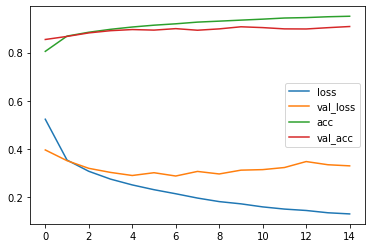

In [20]:
# Plotar a função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

# Plotar acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

Efetuar Predições e Matriz de Confusão

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f805cf6a450>)

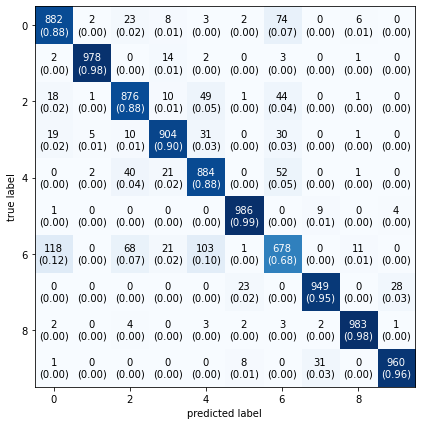

In [21]:
# Efetuar predições
y_pred = model.predict(x_test).argmax(axis=1)

# Mostrar a matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True)

Analisar Algumas Predições Incorretas

Text(0.5, 1.0, 'True label: T-shirt/top Predicted: Shirt')

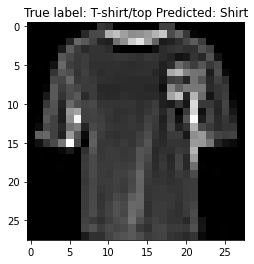

In [32]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
misclassified = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]],
labels[y_pred[i]]))